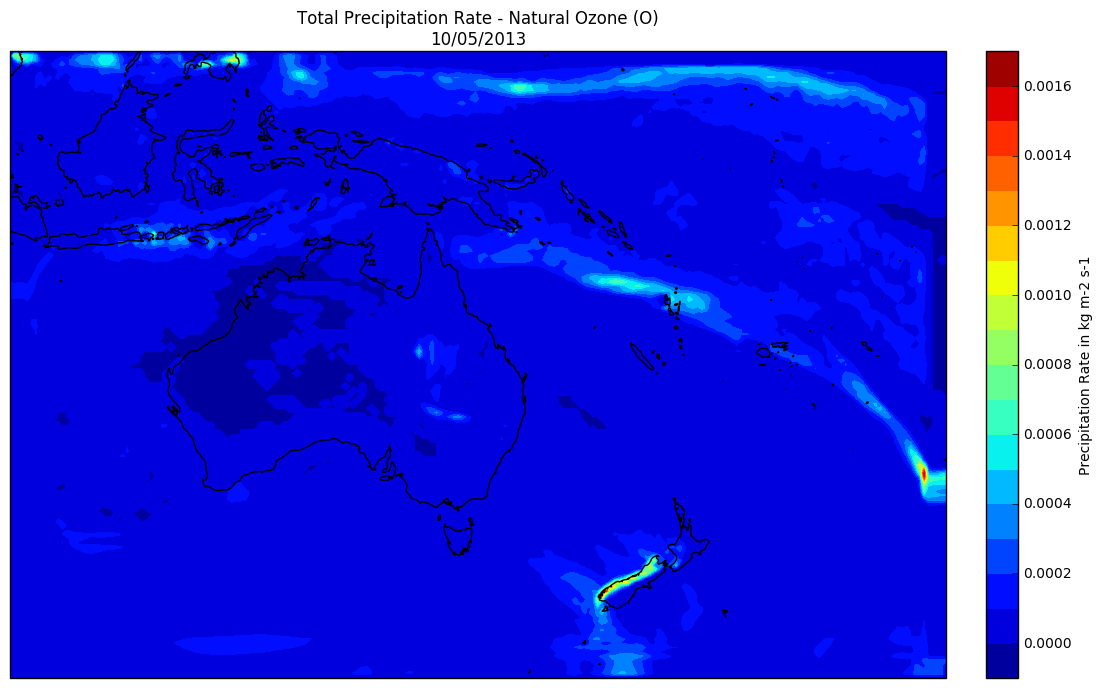

In [220]:
from netCDF4 import Dataset, num2date
import numpy as np

directory = "C:/Users/nistorbe/NetCDF/pr_day_hadam3p_anz_o00z_2012_1_008620260_0.nc"
wah_DATA = Dataset(directory)

import matplotlib.pyplot as plt
from cartopy import config, crs


LAT = wah_DATA.variables['latitude0']
LON = wah_DATA.variables['longitude0']
TIME = wah_DATA.variables['time0']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 159
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
prData = wah_DATA.variables['field90'][timeIndex,:,:,:]
units = wah_DATA.variables['field90'].units

pr_min, pr_max = -np.abs(prData[0]).max(), np.abs(prData[0]).max()

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = figure1.add_subplot(1, 1, 1,  aspect='equal')

rotation = 180.0
rp = crs.RotatedPole(pole_longitude=141.38,pole_latitude=60.31, central_rotated_longitude=rotation)
pc = crs.PlateCarree()

ax = axes(projection=rp)
ax.coastlines('50m', linewidth=0.8)
#ax.pcolor(lonData - rotation, latData, prData[0], vmin=pr_min, vmax=pr_max)

prmap = ax.contourf(lonData - rotation, latData, prData[0],20,cmap='jet')
#

date = num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y')
plt.title('Total Precipitation Rate - Natural Ozone (O)' + '\n' + date)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')


cbar = plt.colorbar(prmap, fraction=0.0311, pad=0.04)
cbar.ax.set_ylabel('Precipitation Rate in ' + units)


show()
figure1.savefig('2012_pr_o_20130510')